# Heart deseases dataset

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [189]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [190]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [191]:
data.shape

(303, 14)

In [192]:
data[["trestbps", "chol", "thalach"]] = MinMaxScaler().fit_transform(data[["trestbps", "chol", "thalach"]])
data.head()

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,0.481132,0.244292,1,0,0.603053,0,2.3,0,0,1,1
1,37,1,2,0.339623,0.283105,0,1,0.885496,0,3.5,0,0,2,1
2,41,0,1,0.339623,0.178082,0,0,0.770992,0,1.4,2,0,2,1
3,56,1,1,0.245283,0.251142,0,1,0.816794,0,0.8,2,0,2,1
4,57,0,0,0.245283,0.520548,0,1,0.702290,1,0.6,2,0,2,1


In [193]:
x_data = np.array(data.drop("target", axis=1))
y_target = np.array(data["target"])

In [194]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.2, random_state=101)

### Neural network with Keras

In [195]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.optimizers import SGD

In [223]:
model = Sequential()

model.add(Dense(units=50, activation="relu"))
model.add(BatchNormalization())

model.add(Dense(units=1, activation="sigmoid"))

In [224]:
model.compile(loss="binary_crossentropy", optimizer=SGD(0.001), metrics=["accuracy"])

In [225]:
train = model.fit(x_train, 
                  y_train, 
                  epochs=10, 
                  steps_per_epoch=200, 
                  validation_data=(x_test, y_test), 
                  validation_steps=5)

Train on 242 samples, validate on 61 samples
Epoch 1/10
200/200 [==============================] - 1s 6ms/step - loss: 0.5837 - acc: 0.7219 - val_loss: 0.6169 - val_acc: 0.6230
Epoch 2/10
200/200 [==============================] - 0s 1ms/step - loss: 0.4994 - acc: 0.8252 - val_loss: 0.4919 - val_acc: 0.8361
Epoch 3/10
200/200 [==============================] - 0s 1ms/step - loss: 0.4661 - acc: 0.8287 - val_loss: 0.4512 - val_acc: 0.8525
Epoch 4/10
200/200 [==============================] - 0s 1ms/step - loss: 0.4434 - acc: 0.8316 - val_loss: 0.4313 - val_acc: 0.8525
Epoch 5/10
200/200 [==============================] - 0s 1ms/step - loss: 0.4257 - acc: 0.8340 - val_loss: 0.4149 - val_acc: 0.8525
Epoch 6/10
200/200 [==============================] - 0s 1ms/step - loss: 0.4112 - acc: 0.8380 - val_loss: 0.4045 - val_acc: 0.8525
Epoch 7/10
200/200 [==============================] - 0s 1ms/step - loss: 0.3997 - acc: 0.8350 - val_loss: 0.3940 - val_acc: 0.8525
Epoch 8/10
200/200 [===========

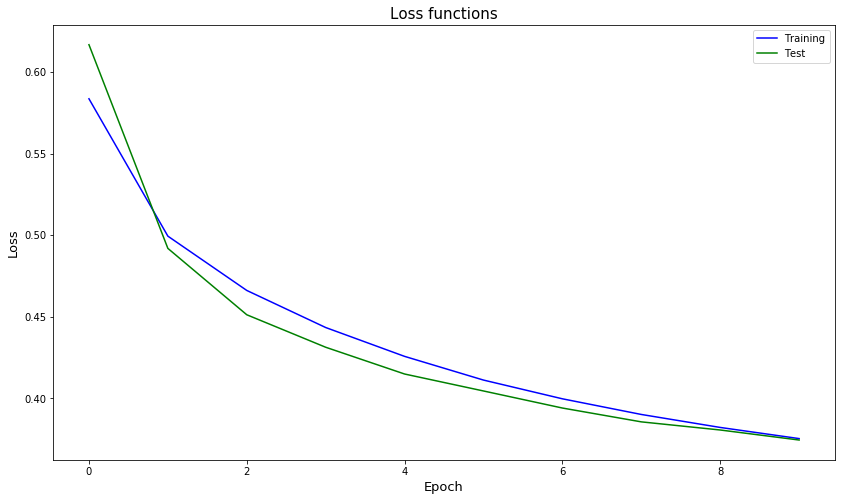

In [226]:
plt.figure(figsize=(14,8))
plt.plot(train.history["loss"], "b", label="Training")
plt.plot(train.history["val_loss"], "g", label="Test")
plt.title("Loss functions", fontsize=15)
plt.xlabel("Epoch", fontsize=13)
plt.ylabel("Loss", fontsize=13)
plt.legend(loc="upper right")
plt.show()

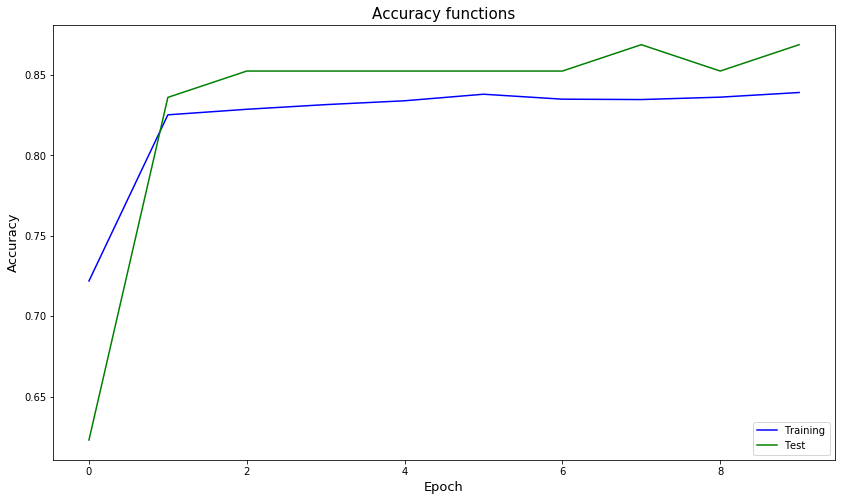

In [227]:
plt.figure(figsize=(14,8))
plt.plot(train.history["acc"], "b", label="Training")
plt.plot(train.history["val_acc"], "g", label="Test")
plt.title("Accuracy functions", fontsize=15)
plt.xlabel("Epoch", fontsize=13)
plt.ylabel("Accuracy", fontsize=13)
plt.legend(loc="lower right")
plt.show()

In [228]:
val_loss, val_acc = model.evaluate(x_test, y_test, verbose=0)
print("Evaluation Loss: {}, Evaluation accuracy: {}".format(val_loss, val_acc))

Evaluation Loss: 0.37438352137315467, Evaluation accuracy: 0.8688524521765162


In [229]:
predictions = model.predict_classes(x_test)

In [230]:
from sklearn.metrics import confusion_matrix

In [231]:
cm = confusion_matrix(y_test, predictions)

cm_df = pd.DataFrame(data=cm, columns=[0,1], index=[0,1])

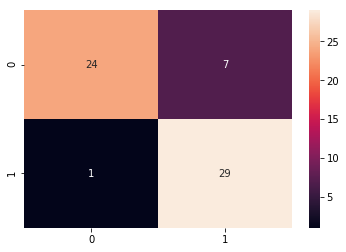

In [232]:
import seaborn as sns

sns.heatmap(cm_df, annot=True)